In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
import math
#stringency_index, population, aged_70_older, gdp_per_capita, extreme_poverty, cardiovasc_death_rate, - Mirela

In [62]:
dataset = pd.read_csv("moldova-covid-data.csv")
dataset.shape

(604, 66)

In [64]:
dataset = dataset[[
    'date',
    'total_cases',
    'new_cases_smoothed',
    'stringency_index', 
    'population', 
    'aged_70_older', 
    'gdp_per_capita', 
    'extreme_poverty', 
    'cardiovasc_death_rate'
]]

dataset.shape

(604, 9)

In [65]:
# All available variables
dataset.columns.tolist()

['date',
 'total_cases',
 'new_cases_smoothed',
 'stringency_index',
 'population',
 'aged_70_older',
 'gdp_per_capita',
 'extreme_poverty',
 'cardiovasc_death_rate']

In [66]:
# Variable types
dataset.dtypes

date                      object
total_cases              float64
new_cases_smoothed       float64
stringency_index         float64
population               float64
aged_70_older            float64
gdp_per_capita           float64
extreme_poverty          float64
cardiovasc_death_rate    float64
dtype: object

In [67]:
dataset['date'] = pd.to_datetime(dataset['date'])

C:\Users\xps\AppData\Local\Programs\Python\Python36\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [68]:
# Variable types
dataset.dtypes

date                     datetime64[ns]
total_cases                     float64
new_cases_smoothed              float64
stringency_index                float64
population                      float64
aged_70_older                   float64
gdp_per_capita                  float64
extreme_poverty                 float64
cardiovasc_death_rate           float64
dtype: object

In [69]:
dataset.head(50)

,date,total_cases,new_cases_smoothed,stringency_index,population,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate
0,2020-03-08,1.0,NaN,11.11,4024025.0,6.955,5189.972,0.2,408.502
1,2020-03-09,1.0,NaN,11.11,4024025.0,6.955,5189.972,0.2,408.502
2,2020-03-10,3.0,NaN,33.33,4024025.0,6.955,5189.972,0.2,408.502
3,2020-03-11,3.0,NaN,51.85,4024025.0,6.955,5189.972,0.2,408.502
4,2020-03-12,3.0,NaN,51.85,4024025.0,6.955,5189.972,0.2,408.502
5,2020-03-13,6.0,0.857,51.85,4024025.0,6.955,5189.972,0.2,408.502
6,2020-03-14,12.0,1.714,51.85,4024025.0,6.955,5189.972,0.2,408.502
7,2020-03-15,23.0,3.143,51.85,4024025.0,6.955,5189.972,0.2,408.502
8,2020-03-16,23.0,3.143,51.85,4024025.0,6.955,5189.972,0.2,408.502
9,2020-03-17,30.0,3.857,54.63,4024025.0,6.955,5189.972,0.2,408.502


In [77]:
dataset.tail(50)

,date,total_cases,new_cases_smoothed,stringency_index,population,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate
554,2021-09-13,275558.0,696.143,29.63,4024025.0,6.955,5189.972,0.2,408.502
555,2021-09-14,276701.0,738.000,29.63,4024025.0,6.955,5189.972,0.2,408.502
556,2021-09-15,277854.0,789.857,29.63,4024025.0,6.955,5189.972,0.2,408.502
557,2021-09-16,279143.0,869.571,29.63,4024025.0,6.955,5189.972,0.2,408.502
558,2021-09-17,280175.0,893.857,29.63,4024025.0,6.955,5189.972,0.2,408.502
559,2021-09-18,281216.0,945.286,25.93,4024025.0,6.955,5189.972,0.2,408.502
560,2021-09-19,281700.0,984.000,25.93,4024025.0,6.955,5189.972,0.2,408.502
561,2021-09-20,282650.0,1013.143,25.93,4024025.0,6.955,5189.972,0.2,408.502
562,2021-09-21,283950.0,1035.571,25.93,4024025.0,6.955,5189.972,0.2,408.502
563,2021-09-22,285321.0,1066.714,25.93,4024025.0,6.955,5189.972,0.2,408.502


In [58]:
stats_df = dataset.describe()
stats_df.loc['skewness'] = dataset.skew()
stats_df.loc['kurtosis'] = dataset.kurt()
stats_df

,stringency_index,population,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate
count,106613.000000,1.268940e+05,111929.000000,113271.000000,75771.000000,112794.000000
mean,56.498595,1.215773e+08,5.533795,19234.760700,13.500041,259.927522
std,20.648320,6.740166e+08,4.217149,20055.653922,19.989045,119.824163
min,0.000000,4.700000e+01,0.526000,661.240000,0.100000,79.370000
25%,42.590000,2.015490e+06,2.063000,4449.898000,0.600000,168.711000
50%,57.410000,9.442867e+06,3.871000,12951.839000,2.200000,243.811000
75%,72.220000,3.393361e+07,8.678000,27216.445000,21.200000,329.942000
max,100.000000,7.874966e+09,18.493000,116935.600000,77.600000,724.417000
skewness,-0.310892,9.488117e+00,0.931158,1.830809,1.630827,0.860527
kurtosis,-0.440620,9.760505e+01,-0.290105,4.163141,1.643774,0.672394


In [70]:
def get_bins(n):
    return int(1 + 3.3 * math.log(n))

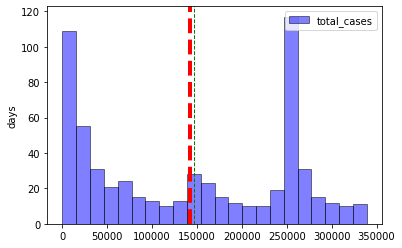

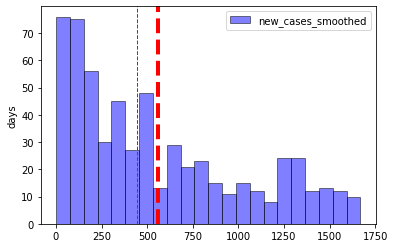

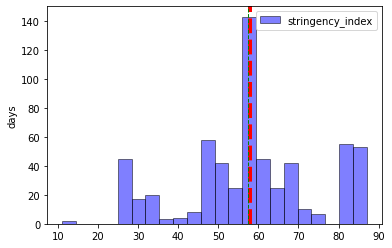

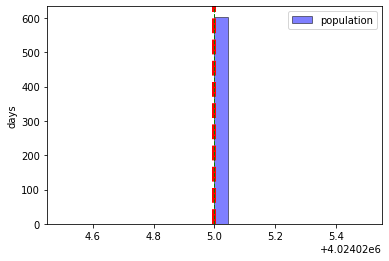

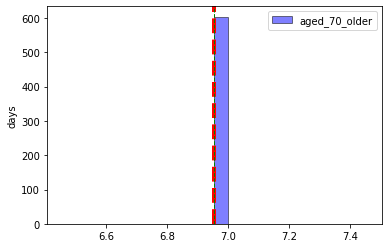

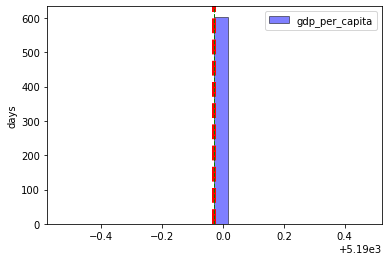

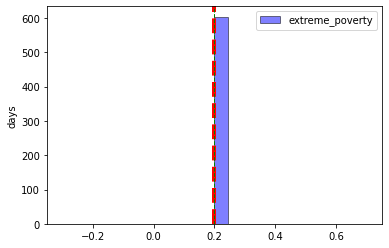

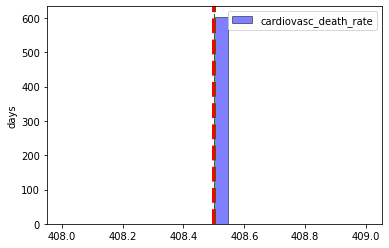

In [73]:
dataset_size = dataset.shape[0]
bins = get_bins(dataset_size)

for column in dataset.columns:
    if column in ['date', 'location']:
        continue
    plt.hist(dataset[column], bins=bins, alpha=0.5, label=column, color='blue', edgecolor='black')
    plt.axvline(dataset[column].mean(), color ='red', linewidth = 4, linestyle = 'dashed')
    plt.axvline(dataset[column].median(), color ='green', linewidth = 1, linestyle = 'dashed')
    plt.legend(loc='upper right')
    plt.ylabel('days')
    plt.show()

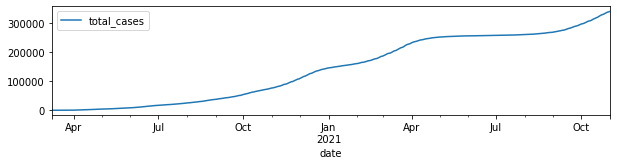

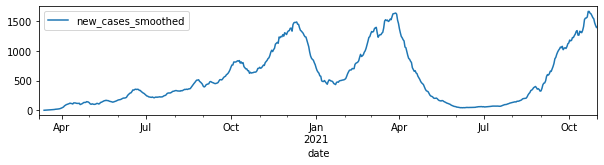

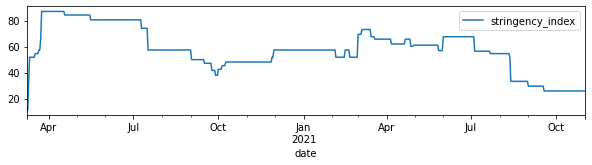

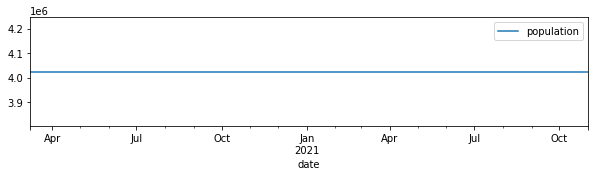

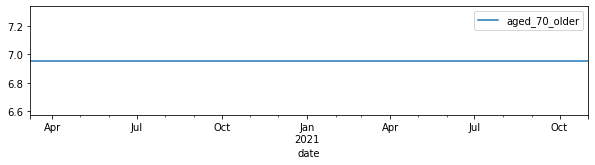

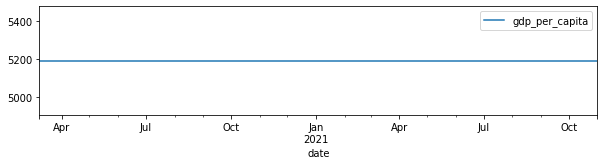

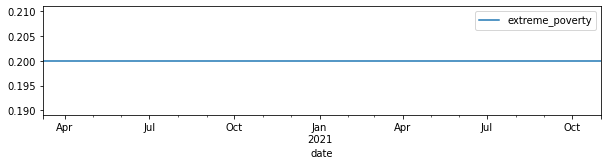

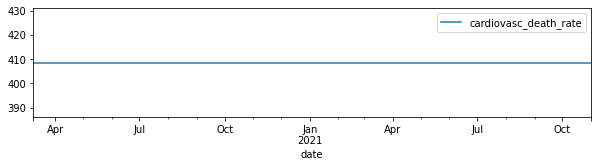

In [75]:
def plot_data_in_time():
    for column in dataset.columns:
        if column in ['date']:
            continue
        dataset.plot(kind='line', x='date', y=column, figsize=(10, 2));

plot_data_in_time()

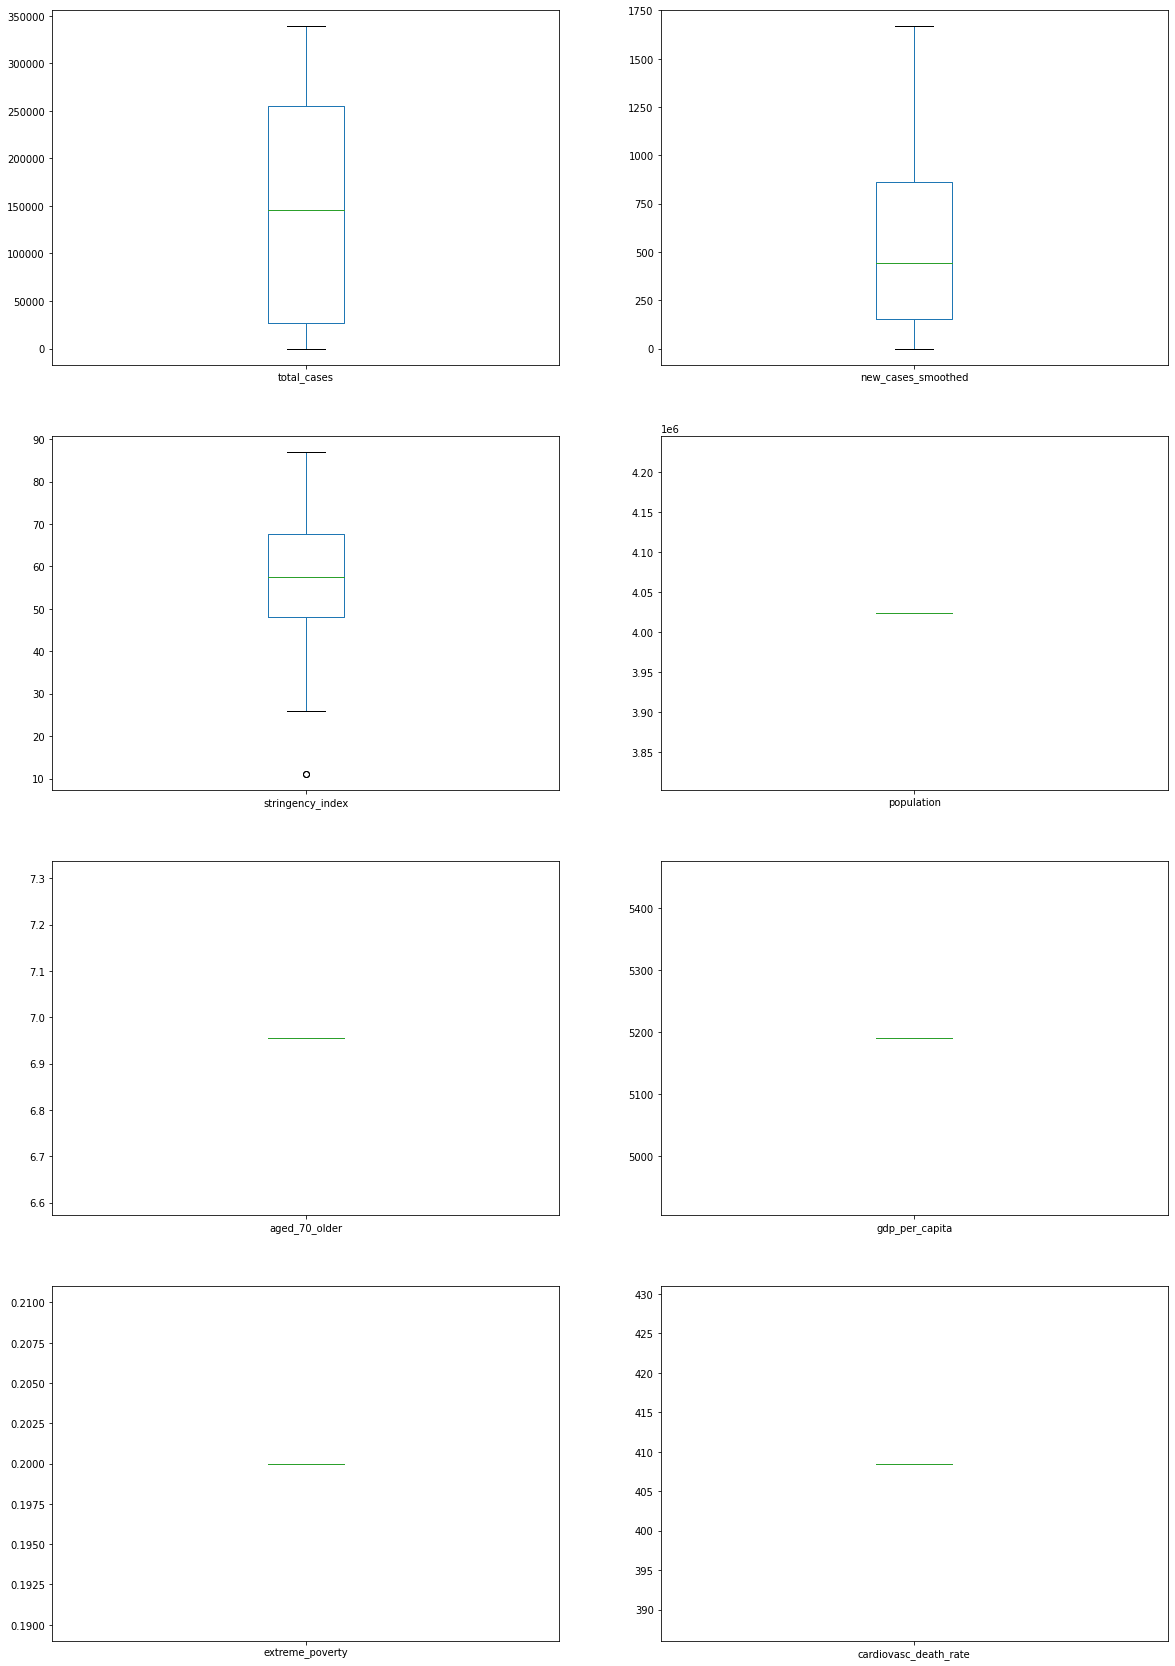

In [76]:
dataset.plot(kind='box', subplots=True, layout=(4, 2), sharex=False, sharey=False, figsize=(20, 30));